In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

In [126]:
file = pd.read_csv('Data 2.csv')
file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [127]:
X = file[['Annual Income (k$)', 'Spending Score (1-100)']].values
k = 5
max_iterations = 100

# K-Mean Clustering

In [128]:
#initializing the centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)] #randomly selecting k points from the dataset
for i in range(max_iterations):
    # Compute the distance between each data point and each centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)

for j in range(k):
    centroids[j] = np.mean(X[labels == j], axis=0)

In [129]:
for i in range(max_iterations):
    old_labels = labels
    # Compute the distance between each data point and each centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)
    # Update the centroids to be the mean of all data points in the cluster
    for j in range(k):
        centroids[j] = np.mean(X[labels == j], axis=0)
    # Check if the clusters no longer change
    if np.all(old_labels == labels):
        break
    old_labels = labels

### Visualization of the data

In [130]:
import plotly.express as px

# create a DataFrame with the data and the labels
data = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
data['label'] = labels

# create the scatter plot
fig = px.scatter(data, x='Annual Income (k$)', y='Spending Score (1-100)', color='label', 
                 title='K-means Clustering', template='plotly_white', 
                 labels={'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'}, 
                 hover_data={'Annual Income (k$)': True, 'Spending Score (1-100)': True})

# add the centroids to the plot
fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(color='black', size=10), 
                name='Centroids')

# show the plot
fig.show()

### Find the optimum number of clusters using silhouette analysis

Optimal number of clusters is: 5


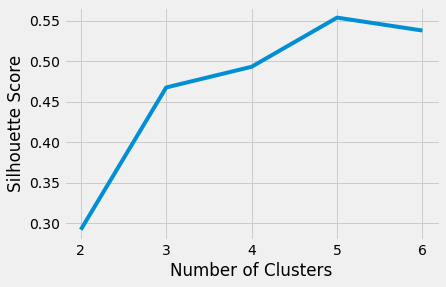

In [131]:
# %%
#Find the optimum number of clusters using silhouette analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
for n_cluster in range(2,7): 
    silhouette_scores.append(
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X)))
    

# print optimal number of clusters
optimal_n = silhouette_scores.index(max(silhouette_scores)) + 2 # +2 because range starts from 2
print("Optimal number of clusters is:", optimal_n)


plt.style.use('fivethirtyeight')
plt.plot(range(2,7), silhouette_scores)
plt.xticks(range(2,7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

###  optimal number of clusters using elbow method

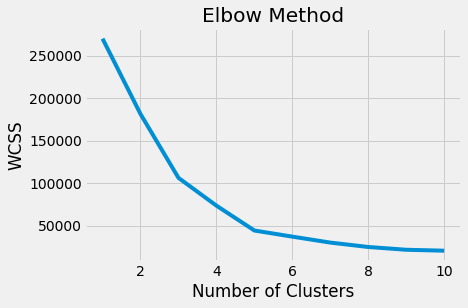

In [132]:
from sklearn.cluster import KMeans
# compute within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X) # X is your data matrix
    wcss.append(kmeans.inertia_)

# plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Implementation of Hierarchical Clustering

In [133]:
# Implement Hierarchical clustering (Agglomerative) FROM SCRATCH
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# now we will implement the agglomerative clustering algorithm
class AgglomerativeClustering: # this class will have two methods: __init__ and fit
    def __init__(self, n_clusters): 
        self.n_clusters = n_clusters 
        self.clusters = [] 
        for i in range(self.n_clusters): 
            self.clusters.append([i])
    
    def fit(self, X):  
        clusters = self.clusters
        while len(clusters) > 1: #
            # calculate the distance between each cluster
            distances = []
            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance = self.cluster_distance(X, clusters[i], clusters[j])
                    distances.append([distance, [i, j]])
            # sort the distances
            distances = sorted(distances)
            # merge the two clusters that are closest to each other
            closest_clusters = distances[0][1]
            clusters[closest_clusters[0]] = clusters[closest_clusters[0]] + clusters[closest_clusters[1]]
            del clusters[closest_clusters[1]]
        self.clusters = clusters
    
    def cluster_distance(self, X, cluster1, cluster2):
        # calculate the average distance between each point in cluster1 and each point in cluster2
        total_distance = 0
        for i in range(len(cluster1)):
            for j in range(len(cluster2)):
                total_distance += euclidean_distance(X[cluster1[i]], X[cluster2[j]])
        return total_distance / (len(cluster1) * len(cluster2))
    
    # predict which cluster each data point belongs to
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(self.clusters)):
            for j in range(len(self.clusters[i])):
                y_pred[self.clusters[i][j]] = i
        return y_pred

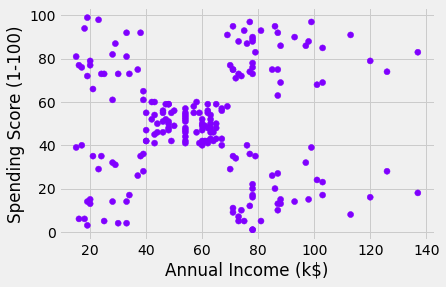

[[0, 4, 2, 1, 3]]


In [134]:
#now call the class and fit the data
model = AgglomerativeClustering(n_clusters=5)
model.fit(X)

#plot the clusters
plt.style.use('fivethirtyeight') # use the fivethirtyeight style which is used in the plots of the website
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


#print the clusters
print(model.clusters)

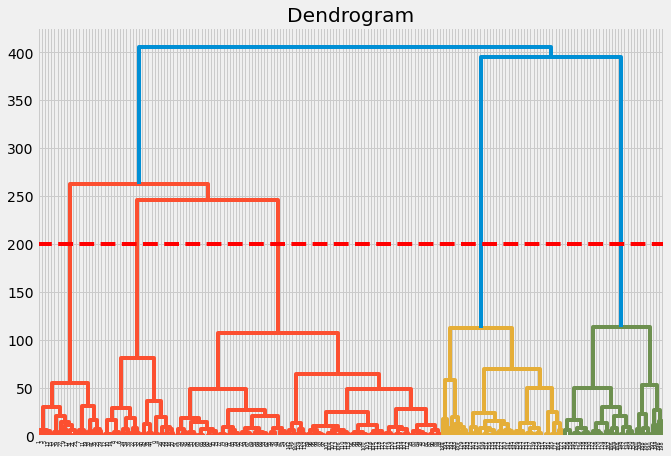

In [135]:
# make dendrogram of the clusters we made from scratch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(hierarchy.linkage(X, method='ward'))
plt.axhline(y=200, color='r', linestyle='--')
plt.show()



# Dendograms

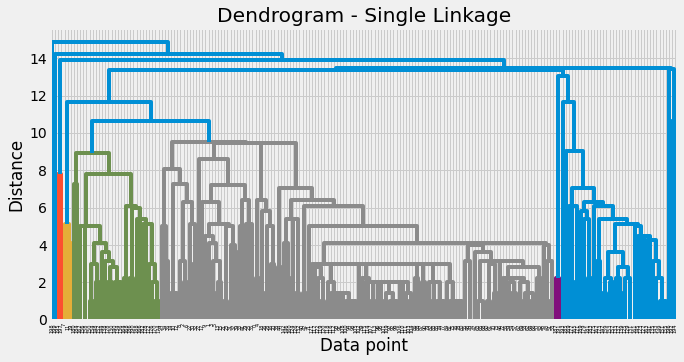

In [136]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using single linkage
Z_single = linkage(X, method='single')

# Visualize the dendrogram for single linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram - Single Linkage')
dendrogram(Z_single)
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

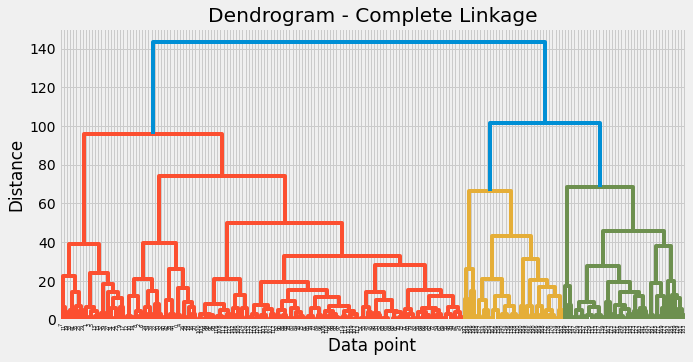

In [137]:
# Perform hierarchical clustering using complete linkage
Z_complete = linkage(X, method='complete')

# Visualize the dendrogram for complete linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram - Complete Linkage')
dendrogram(Z_complete)
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

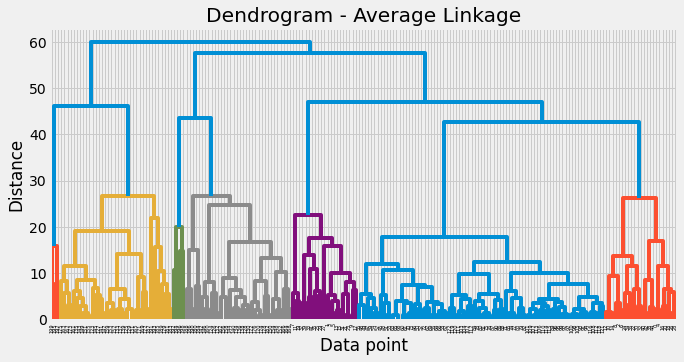

In [138]:
# Perform hierarchical clustering using average linkage
Z_average = linkage(X, method='average')

# Visualize the dendrogram for average linkage
plt.figure(figsize=(10, 5))
plt.title('Dendrogram - Average Linkage')
dendrogram(Z_average)
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

In [139]:
# Find the optimal number of clusters for single linkage
distances = Z_single[:, 2] # the third column contains the distances between clusters
num_clusters_single = len(np.where(distances > 10)[0]) + 1 # the threshold is 10
print(f'Optimal number of clusters for single linkage: {num_clusters_single}') 

# Find the optimal number of clusters for complete linkage
distances = Z_complete[:, 2]
num_clusters_complete = len(np.where(distances > 10)[0]) + 1
print(f'Optimal number of clusters for complete linkage: {num_clusters_complete}')

# Find the optimal number of clusters for average linkage
distances = Z_average[:, 2]
num_clusters_average = len(np.where(distances > 10)[0]) + 1
print(f'Optimal number of clusters for average linkage: {num_clusters_average}')

Optimal number of clusters for single linkage: 12
Optimal number of clusters for complete linkage: 56
Optimal number of clusters for average linkage: 39


#### Visualize and compare the results of K-Means and Hierarchical Clustering

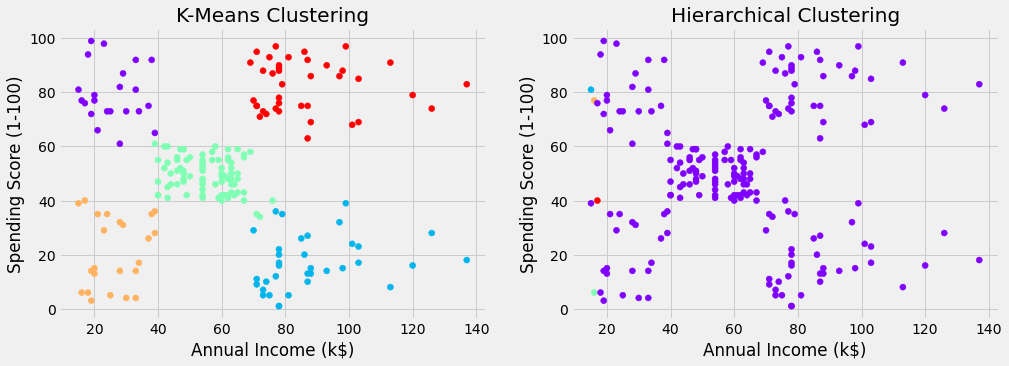

In [140]:
# Visualize and compare the results of K-Means and Hierarchical Clustering
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=5).fit_predict(X), cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=AgglomerativeClustering(n_clusters=5).predict(X), cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()